Objective: To explore the relationship between trader performance and market sentiment, uncover hidden patterns, and deliver insights that can drive smarter trading strategies.


In [14]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [15]:
# Load the and check the dataset
traders_df=pd.read_csv("E:\\DS_Projects\\historical_data.csv")
sentiment_df=pd.read_csv("E:\\DS_Projects\\fear_greed_index.csv")


In [16]:
traders_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [17]:
sentiment_df.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [18]:
# Check for missing values
traders_df.isnull().sum()


Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64

In [19]:
# Check for missing values
sentiment_df.isnull().sum()


timestamp         0
value             0
classification    0
date              0
dtype: int64

In [20]:
# Display summary statistics
print("Statistics summary of Traders", traders_df.describe())
print("Statistics summary of Sentiments", sentiment_df.describe())

Statistics summary of Traders        Execution Price   Size Tokens      Size USD  Start Position  \
count    211224.000000  2.112240e+05  2.112240e+05    2.112240e+05   
mean      11414.723350  4.623365e+03  5.639451e+03   -2.994625e+04   
std       29447.654868  1.042729e+05  3.657514e+04    6.738074e+05   
min           0.000005  8.740000e-07  0.000000e+00   -1.433463e+07   
25%           4.854700  2.940000e+00  1.937900e+02   -3.762311e+02   
50%          18.280000  3.200000e+01  5.970450e+02    8.472793e+01   
75%         101.580000  1.879025e+02  2.058960e+03    9.337278e+03   
max      109004.000000  1.582244e+07  3.921431e+06    3.050948e+07   

          Closed PnL      Order ID            Fee      Trade ID     Timestamp  
count  211224.000000  2.112240e+05  211224.000000  2.112240e+05  2.112240e+05  
mean       48.749001  6.965388e+10       1.163967  5.628549e+14  1.737744e+12  
std       919.164828  1.835753e+10       6.758854  3.257565e+14  8.689920e+09  
min   -117990.10410

## Convert timestamp in sentiment data (handle various formats)
Converting timestamp into readable and common formate for both the data sheets

In [21]:
# Convert timestamp in sentiment data (handle various formats)
sentiment_df['Date'] = pd.to_datetime(sentiment_df['date'], errors='coerce')

# Convert timestamp in trader data (assuming it's in milliseconds)
traders_df['time'] = pd.to_datetime(traders_df['Timestamp'], unit='ms', errors='coerce')

# Optional: round time to date to simplify merging
traders_df['date'] = traders_df['time'].dt.date
sentiment_df['date'] = sentiment_df['Date'].dt.date

In [22]:
#Merging both the tables on date
merged_df = pd.merge(traders_df, sentiment_df, on='date', how='inner')

In [23]:
merged_df

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,...,Crossed,Fee,Trade ID,Timestamp,time,date,timestamp,value,classification,Date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.000000,...,True,0.345404,8.950000e+14,1.730000e+12,2024-10-27 03:33:20,2024-10-27,1730007000,74,Greed,2024-10-27
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.000000,...,True,0.005600,4.430000e+14,1.730000e+12,2024-10-27 03:33:20,2024-10-27,1730007000,74,Greed,2024-10-27
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.000000,...,True,0.050431,6.600000e+14,1.730000e+12,2024-10-27 03:33:20,2024-10-27,1730007000,74,Greed,2024-10-27
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.000000,...,True,0.050043,1.080000e+15,1.730000e+12,2024-10-27 03:33:20,2024-10-27,1730007000,74,Greed,2024-10-27
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.000000,...,True,0.003055,1.050000e+15,1.730000e+12,2024-10-27 03:33:20,2024-10-27,1730007000,74,Greed,2024-10-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184258,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,SOL,133.6000,4.13,551.77,BUY,18-04-2025 20:03,-1797.880000,Close Short,-82.883731,...,False,0.055176,6.900000e+14,1.740000e+12,2025-02-19 21:20:00,2025-02-19,1739943000,44,Fear,2025-02-19
184259,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,SOL,133.6000,7.50,1002.00,BUY,18-04-2025 20:03,-1793.750000,Close Short,-150.515250,...,False,0.100200,6.610000e+13,1.740000e+12,2025-02-19 21:20:00,2025-02-19,1739943000,44,Fear,2025-02-19
184260,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,SOL,133.6000,3.93,525.05,BUY,18-04-2025 20:03,-1786.250000,Close Short,-78.869991,...,False,0.052504,1.010000e+15,1.740000e+12,2025-02-19 21:20:00,2025-02-19,1739943000,44,Fear,2025-02-19
184261,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,SOL,133.6000,4.34,579.82,BUY,18-04-2025 20:03,-1782.320000,Close Short,-87.098158,...,False,0.057982,2.700000e+13,1.740000e+12,2025-02-19 21:20:00,2025-02-19,1739943000,44,Fear,2025-02-19


In [26]:
##dropping unwanted and duplicate columns from table
merged_df.drop(columns=['Account', 'Transaction Hash', 'Trade ID', 'time', 'date', 'timestamp', 'Timestamp', 'Order ID'], inplace=True)
print(merged_df)


        Coin  Execution Price  Size Tokens   Size USD Side     Timestamp IST  \
0       @107           7.9769       986.87    7872.16  BUY  02-12-2024 22:50   
1       @107           7.9800        16.00     127.68  BUY  02-12-2024 22:50   
2       @107           7.9855       144.09    1150.63  BUY  02-12-2024 22:50   
3       @107           7.9874       142.98    1142.04  BUY  02-12-2024 22:50   
4       @107           7.9894         8.73      69.75  BUY  02-12-2024 22:50   
...      ...              ...          ...        ...  ...               ...   
184258   SOL         133.6000         4.13     551.77  BUY  18-04-2025 20:03   
184259   SOL         133.6000         7.50    1002.00  BUY  18-04-2025 20:03   
184260   SOL         133.6000         3.93     525.05  BUY  18-04-2025 20:03   
184261   SOL         133.6000         4.34     579.82  BUY  18-04-2025 20:03   
184262   SOL         133.6000      1777.98  237538.13  BUY  18-04-2025 20:03   

        Start Position    Direction    

In [28]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184263 entries, 0 to 184262
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Coin             184263 non-null  object        
 1   Execution Price  184263 non-null  float64       
 2   Size Tokens      184263 non-null  float64       
 3   Size USD         184263 non-null  float64       
 4   Side             184263 non-null  object        
 5   Timestamp IST    184263 non-null  object        
 6   Start Position   184263 non-null  float64       
 7   Direction        184263 non-null  object        
 8   Closed PnL       184263 non-null  float64       
 9   Crossed          184263 non-null  bool          
 10  Fee              184263 non-null  float64       
 11  value            184263 non-null  int64         
 12  classification   184263 non-null  object        
 13  Date             184263 non-null  datetime64[ns]
dtypes: bool(1), datetime

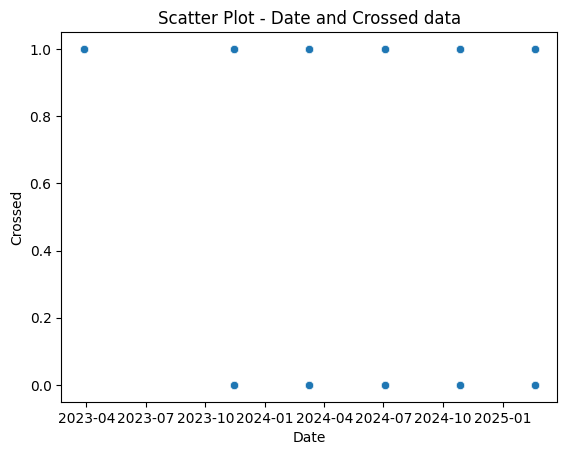

In [29]:
# Scatter plot to observe relationship
sns.scatterplot(data=merged_df, x='Date', y='Crossed')
plt.title("Scatter Plot - Date and Crossed data")
plt.show()

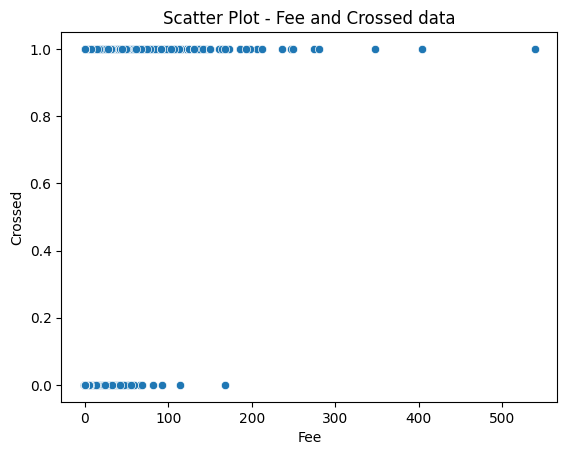

In [30]:
sns.scatterplot(data=merged_df, x='Fee', y='Crossed')
plt.title("Scatter Plot - Fee and Crossed data")
plt.show()

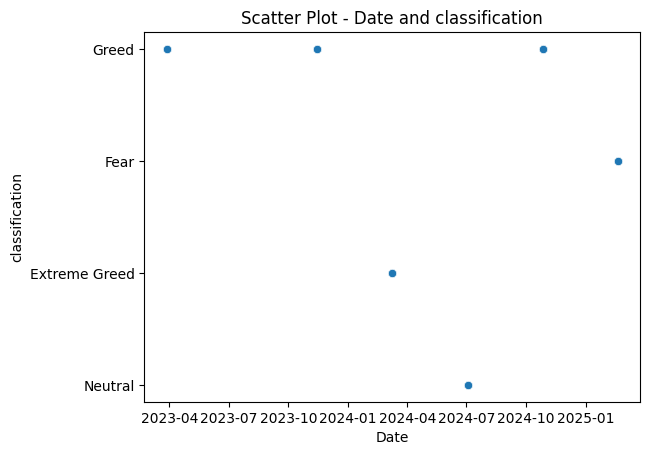

In [31]:
# Scatter plot to observe relationship
sns.scatterplot(data=merged_df, x='Date', y='classification')
plt.title("Scatter Plot - Date and classification")
plt.show()

##Exploratory Data Analysis (EDA):
Counting trades by sentiment (fear vs greed)
Comparing closedPnL under each sentiment
Using sns.pairplot() or groupby() for patterns

In [32]:
avg_pnl = merged_df.groupby('classification')['Closed PnL'].mean()
print(avg_pnl)

classification
Extreme Greed    25.418772
Fear             50.047622
Greed            87.894859
Neutral          22.229713
Name: Closed PnL, dtype: float64


In [36]:
Fee_effect = merged_df.groupby('Crossed')['Fee'].mean()
print(Fee_effect)

Crossed
False    0.228716
True     1.511753
Name: Fee, dtype: float64


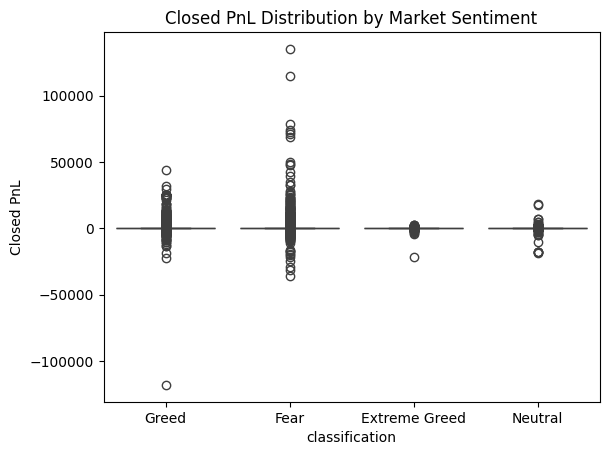

In [33]:
# Boxplot of Closed PnL by sentiment
sns.boxplot(x='classification', y='Closed PnL', data=merged_df)
plt.title('Closed PnL Distribution by Market Sentiment')
plt.show()

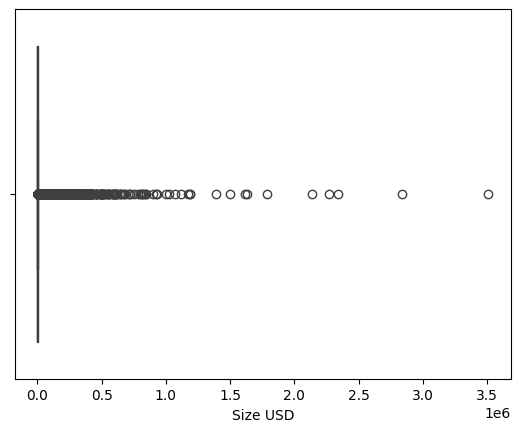

In [34]:
#Check outliers in Size USD
sns.boxplot(x=merged_df['Size USD'])
plt.show()

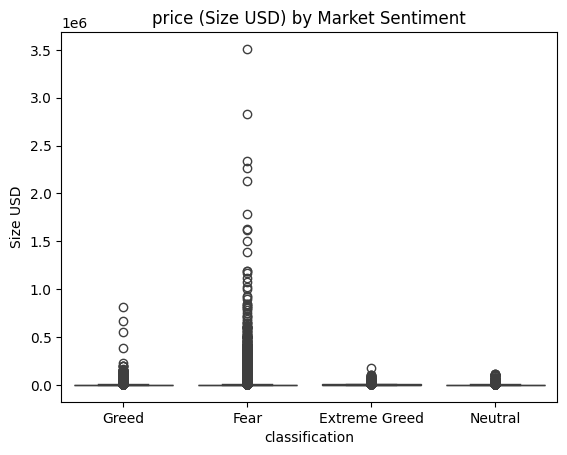

In [35]:
# Boxplot of Size USD by sentiment
sns.boxplot(x='classification', y='Size USD', data=merged_df)
plt.title('price (Size USD) by Market Sentiment')
plt.show()

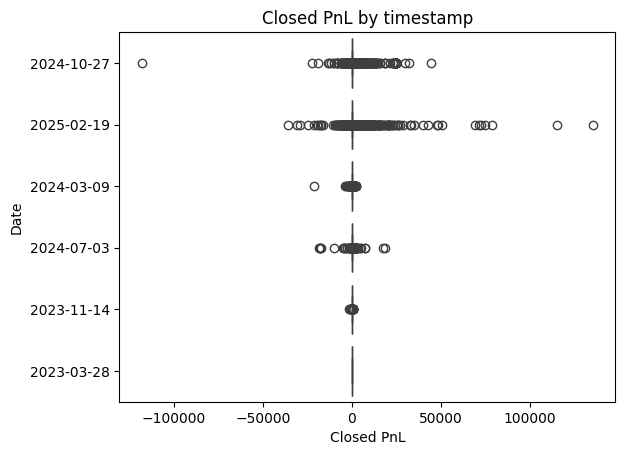

In [38]:
# Boxplot of Closed PnL by sentiment
sns.boxplot(x='Closed PnL', y='Date', data=merged_df)
plt.title('Closed PnL by timestamp')
plt.show()

In [39]:
merged_df.describe()

,Execution Price,Size Tokens,Size USD,Start Position,Closed PnL,Fee,value,Date
count,184263.000000,1.842630e+05,1.842630e+05,1.842630e+05,184263.000000,184263.000000,184263.000000,184263
mean,9624.179560,4.588772e+03,4.780733e+03,1.634172e+04,55.492690,1.003504,51.623484,2025-01-03 07:20:19.420068608
min,0.000005,8.740000e-07,0.000000e+00,-1.433463e+07,-117990.104100,-1.175712,44.000000,2023-03-28 00:00:00
25%,5.024600,3.650000e+00,1.875300e+02,-1.189096e+02,0.000000,0.015936,44.000000,2024-10-27 00:00:00
50%,17.770000,3.400000e+01,5.927400e+02,3.701700e+02,0.000000,0.087527,44.000000,2025-02-19 00:00:00
75%,28.920000,1.803000e+02,2.032705e+03,1.264308e+04,6.602400,0.387603,50.000000,2025-02-19 00:00:00
max,109004.000000,1.582244e+07,3.509753e+06,3.050948e+07,135329.090100,539.021456,84.000000,2025-02-19 00:00:00
std,27106.266497,1.105144e+05,2.690428e+04,3.938825e+05,937.857954,5.152379,13.394326,NaN


In [42]:
#Finding outliers
from scipy import stats

# Z-score calculation
z_scores_Closed_PnL = np.abs(stats.zscore(merged_df['Closed PnL']))
merged_df['z_scores_Closed_PnL'] = z_scores_Closed_PnL

# Set threshold (commonly 3)
outliers = merged_df[merged_df['z_scores_Closed_PnL'] > 3]
print(outliers)

         Coin  Execution Price  Size Tokens   Size USD  Side  \
44       @107           9.0570    2446.3900   22156.95  SELL   
535     EIGEN           2.9120    6926.4900   20169.94   BUY   
536     EIGEN           2.8330   10000.0000   28330.00   BUY   
537     EIGEN           2.7110   10797.5100   29272.05   BUY   
538     EIGEN           2.5889    6908.3300   17884.98   BUY   
...       ...              ...          ...        ...   ...   
183508    ETH        3354.0000      69.5460  233257.28   BUY   
183517    ETH        3354.0000      14.9117   50013.84   BUY   
183519    ETH        3354.0000     274.7973  921670.14   BUY   
184248    SOL         133.6000     407.6700   54464.71   BUY   
184262    SOL         133.6000    1777.9800  237538.13   BUY   

           Timestamp IST  Start Position    Direction    Closed PnL  Crossed  \
44      03-12-2024 14:39      10000.4986         Sell   3008.231185     True   
535     25-10-2024 23:41     -39724.0000  Close Short   7525.631385    

Data Preprocessing

In [44]:
merged_df

,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Crossed,Fee,value,classification,Date,z_scores_Closed_PnL
0,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.000000,True,0.345404,74,Greed,2024-10-27,0.059170
1,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.000000,True,0.005600,74,Greed,2024-10-27,0.059170
2,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.000000,True,0.050431,74,Greed,2024-10-27,0.059170
3,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.000000,True,0.050043,74,Greed,2024-10-27,0.059170
4,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.000000,True,0.003055,74,Greed,2024-10-27,0.059170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184258,SOL,133.6000,4.13,551.77,BUY,18-04-2025 20:03,-1797.880000,Close Short,-82.883731,False,0.055176,44,Fear,2025-02-19,0.147546
184259,SOL,133.6000,7.50,1002.00,BUY,18-04-2025 20:03,-1793.750000,Close Short,-150.515250,False,0.100200,44,Fear,2025-02-19,0.219659
184260,SOL,133.6000,3.93,525.05,BUY,18-04-2025 20:03,-1786.250000,Close Short,-78.869991,False,0.052504,44,Fear,2025-02-19,0.143266
184261,SOL,133.6000,4.34,579.82,BUY,18-04-2025 20:03,-1782.320000,Close Short,-87.098158,False,0.057982,44,Fear,2025-02-19,0.152039


In [54]:
# Define features and target
X = merged_df[['Execution Price', 'Size Tokens', 'Size USD', 'Start Position', 'Fee', 'value']]
y = merged_df['Closed PnL']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Show the result
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)
print("Training set size:", y_train.shape)
print("Testing set size:", y_test.shape)

Training set size: (147410, 6)
Testing set size: (36853, 6)
Training set size: (147410,)
Testing set size: (36853,)


Model Training

In [55]:
# Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

y_pred

array([40.76452042, 49.36127246, 71.42803658, ..., 42.94042877,
       40.64572891, 67.19013514], shape=(36853,))

In [56]:
# Evaluate model performance
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

Mean Squared Error: 783217.7059724688
R² Score: 0.04704039216342304


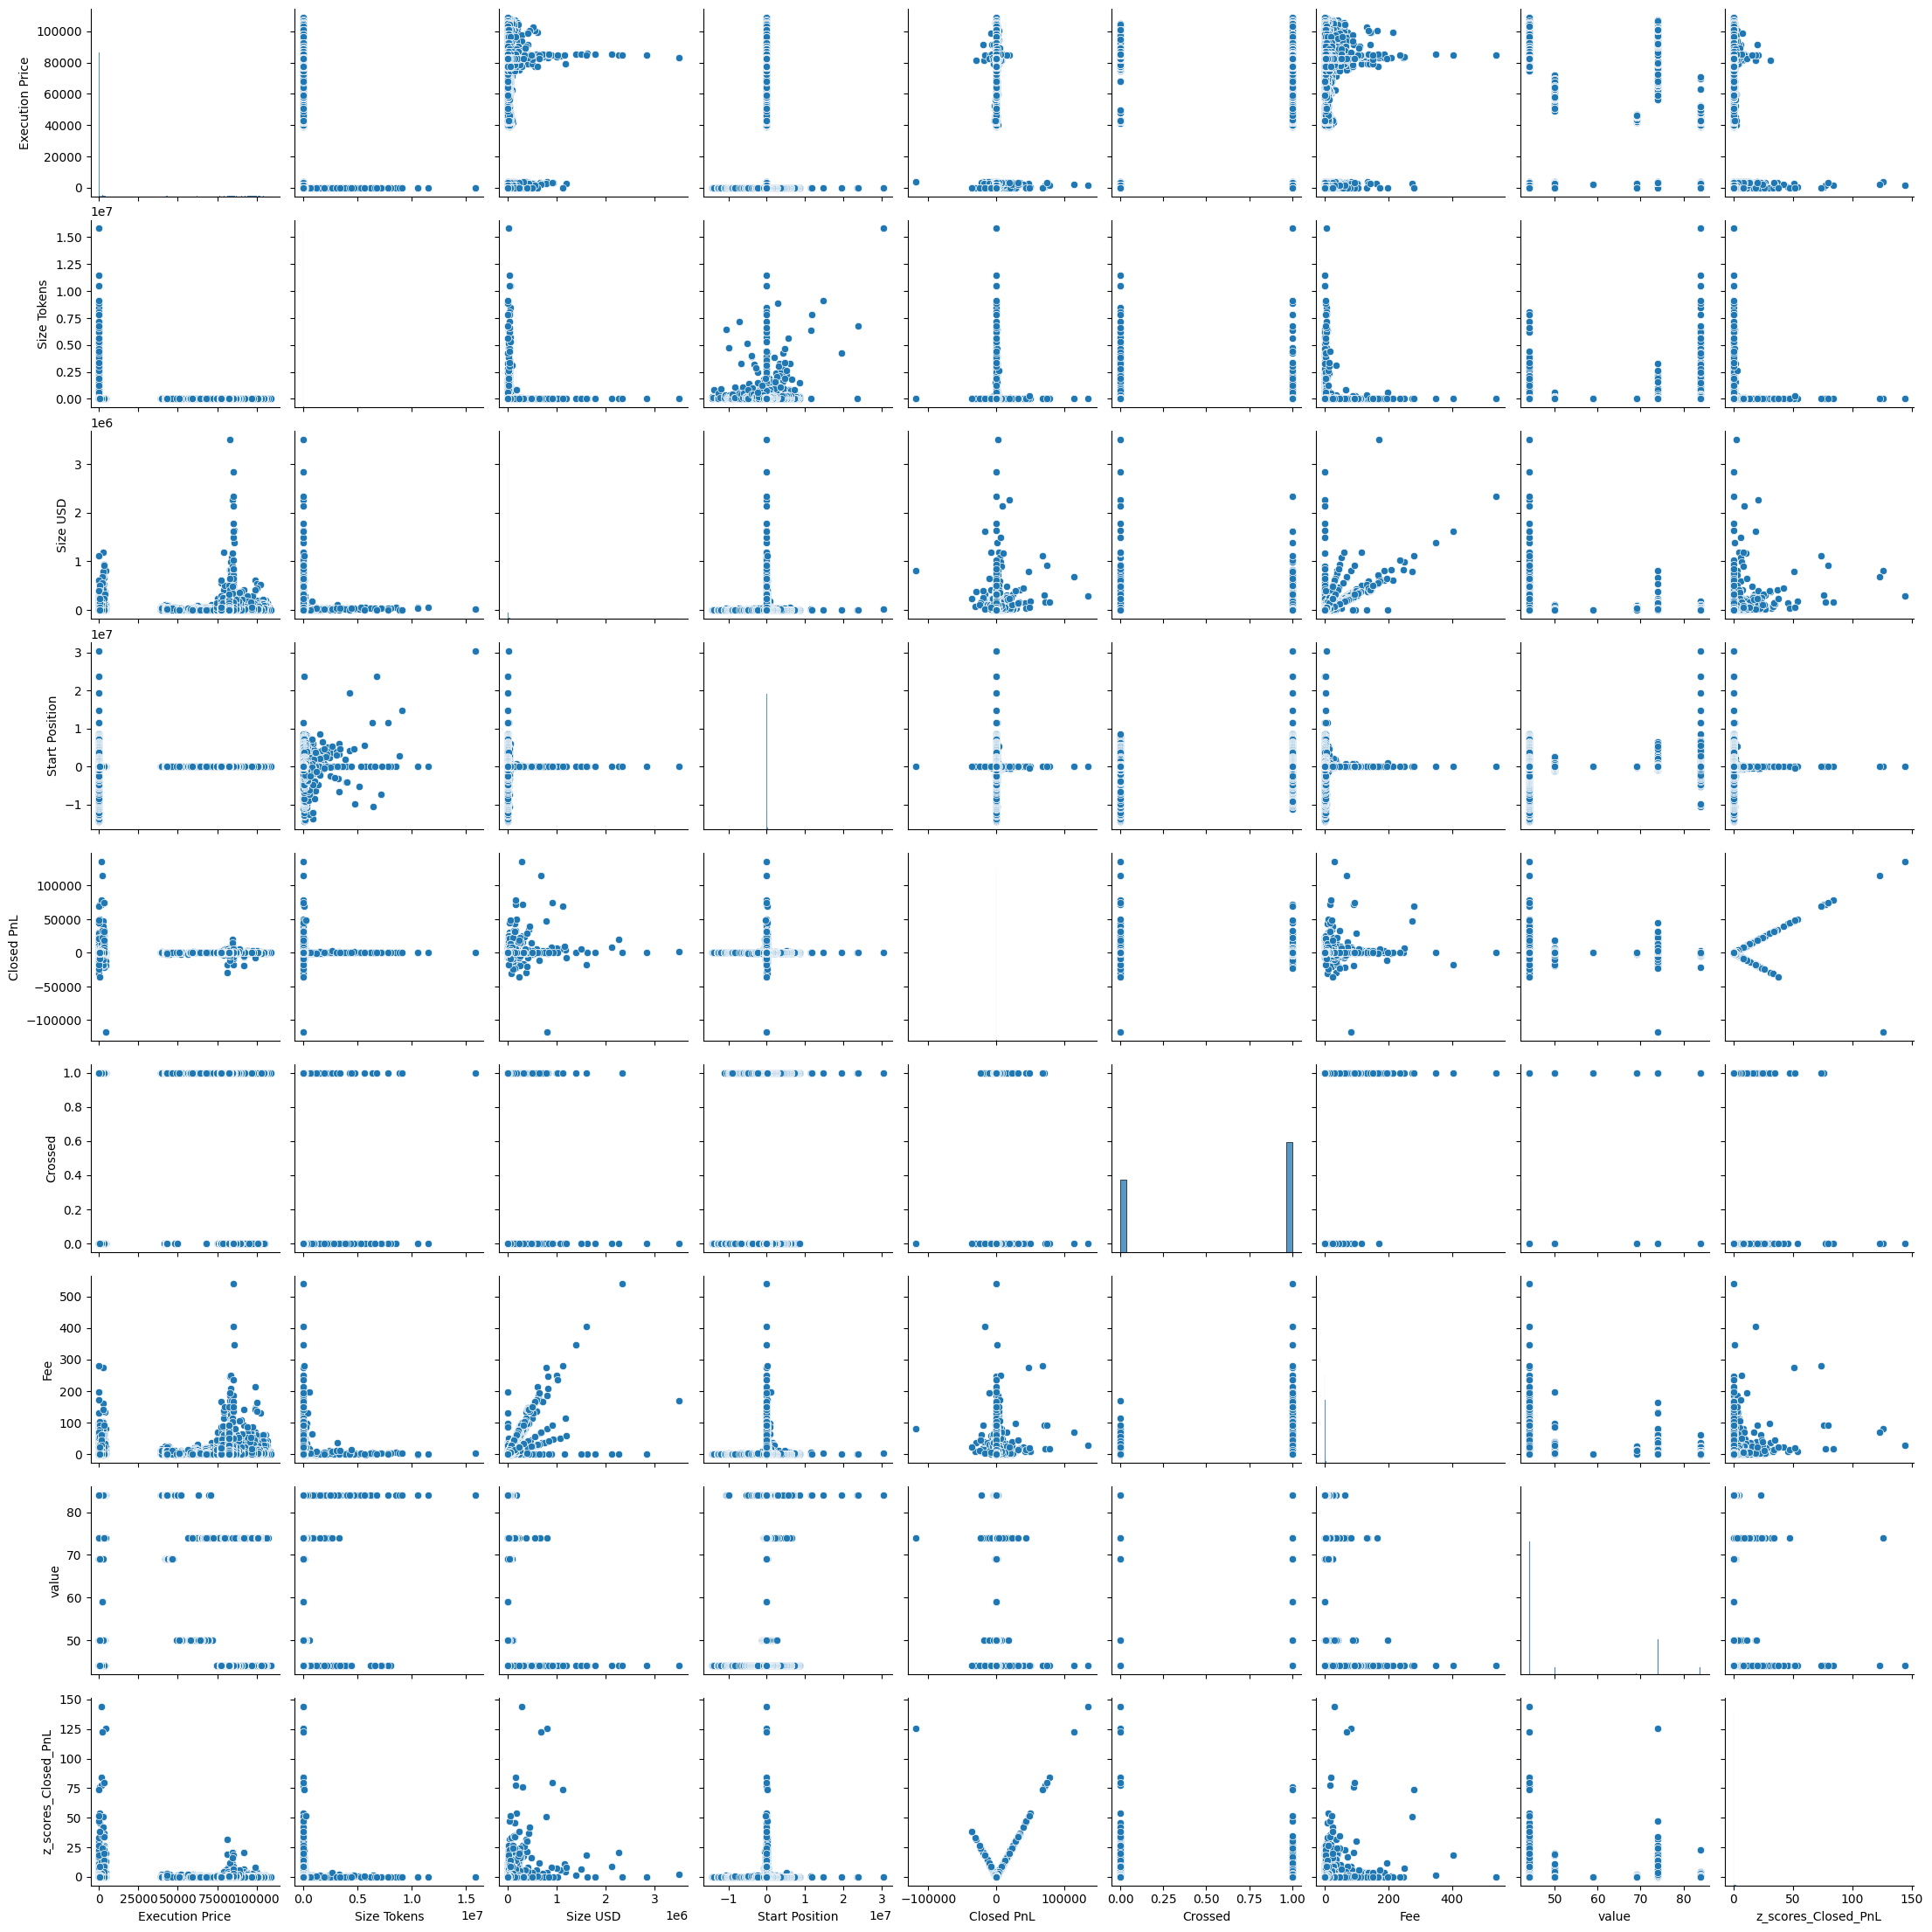

In [57]:
sns.pairplot(merged_df)
plt.show()